In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [12]:
#
# Copyright (C) 2023, Inria
# GRAPHDECO research group, https://team.inria.fr/graphdeco
# All rights reserved.
#
# This software is free for non-commercial, research and evaluation use 
# under the terms of the LICENSE.md file.
#
# For inquiries contact  george.drettakis@inria.fr
#

from pathlib import Path
import os
from PIL import Image
import torch
import torchvision.transforms.functional as tf
from argparse import ArgumentParser

def readImages(renders_dir, gt_dir, textured):
    renders = []
    gts = []
    image_names = []
    print(renders_dir)
    for fname in os.listdir(renders_dir):
        if "_" in fname or "depth" in fname:
            continue
        print(fname)
        fname = fname.split(".")[0]

        if "texture" in str(renders_dir):
            render = Image.open(renders_dir / f"{fname}_texture.png")
        else:
            render = Image.open(renders_dir / f"{fname}.png")
    
        gt = Image.open(renders_dir / f"{fname}_gt.png")
        renders.append(tf.to_tensor(render).unsqueeze(0)[:, :3, :, :].cuda())
        gts.append(tf.to_tensor(gt).unsqueeze(0)[:, :3, :, :].cuda())
        image_names.append(fname)
    return renders, gts, image_names
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from math import exp

def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size // 2) ** 2 / float(2 * sigma ** 2)) for x in range(window_size)])
    return gauss / gauss.sum()

def create_window(window_size, channel):
    _1D_window = gaussian(window_size, 1.5).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = Variable(_2D_window.expand(channel, 1, window_size, window_size).contiguous())
    return window

def ssim(img1, img2, window_size=11, size_average=True):
    channel = img1.size(-3)
    window = create_window(window_size, channel)

    if img1.is_cuda:
        window = window.cuda(img1.get_device())
    window = window.type_as(img1)

    return _ssim(img1, img2, window, window_size, channel, size_average)

def _ssim(img1, img2, window, window_size, channel, size_average=True):
    mu1 = F.conv2d(img1, window, padding=window_size // 2, groups=channel)
    mu2 = F.conv2d(img2, window, padding=window_size // 2, groups=channel)

    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1 * mu2

    sigma1_sq = F.conv2d(img1 * img1, window, padding=window_size // 2, groups=channel) - mu1_sq
    sigma2_sq = F.conv2d(img2 * img2, window, padding=window_size // 2, groups=channel) - mu2_sq
    sigma12 = F.conv2d(img1 * img2, window, padding=window_size // 2, groups=channel) - mu1_mu2

    C1 = 0.01 ** 2
    C2 = 0.03 ** 2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))

    if size_average:
        return ssim_map.mean()
    else:
        return ssim_map.mean(1).mean(1).mean(1)
renders, gts, image_names = readImages(Path("../output/mic_slow_depth/test/texture_per_gaussian_alpha_30000/renders"),None,None)

../output/mic_slow_depth/test/texture_per_gaussian_alpha_30000/renders
00034.png
00005.png
00006.png
00021.png
00028.png
00027.png
00011.png
00004.png
00017.png
00029.png
00001.png
00009.png
00015.png
00016.png
00023.png
00010.png
00007.png
00013.png
00026.png
00020.png
00022.png
00025.png
00037.png
00032.png
00024.png
00019.png
00003.png
00035.png
00014.png
00031.png
00033.png
00012.png
00002.png
00018.png
00008.png
00000.png
00030.png
00036.png


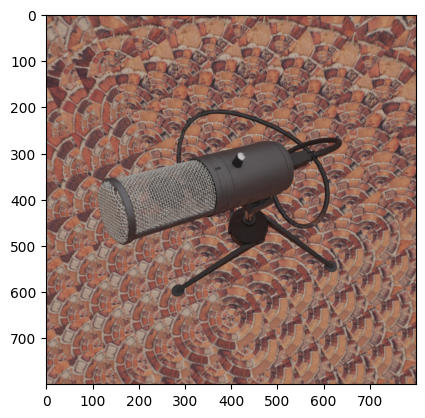

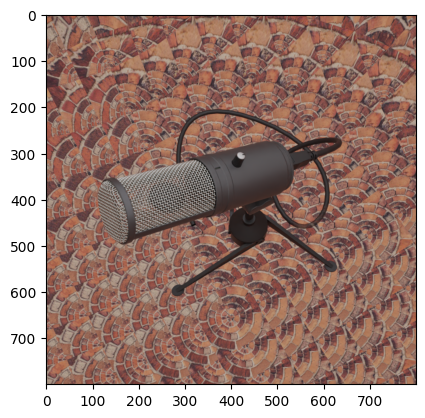

In [13]:
plt.imshow(renders[0].cpu()[0].permute((1,2,0)))
plt.show()
plt.imshow(gts[0].cpu()[0].permute((1,2,0)))
plt.show()

In [14]:
ssim(renders[0],gts[0])

NameError: name 'gaussian' is not defined

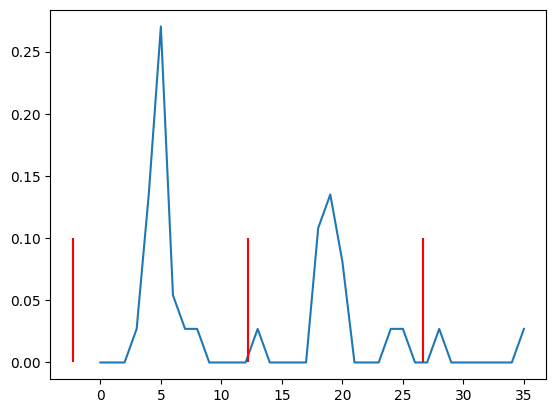

In [15]:
# v = np.array([0,0,0,1,5,10,2,1,1,0,0,0,0,1,0,0,0,0,4,5,3,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1])
# v = v/v.sum()
# i = np.arange(len(v))

# mean = (v*i).sum()
# variance = ((v*(i**2)).sum() - mean)**0.5

# plt.plot(v)
# plt.vlines(mean,0,0.1,"r")
# plt.vlines([mean-variance,mean+variance],0,0.1,"r")

In [17]:
# import open3d as o3d
# import numpy as np
# ply_point_cloud = o3d.data.PLYPointCloud()
# pcd = o3d.io.read_point_cloud(ply_point_cloud.path)
# print(pcd)
# points = np.asarray(pcd.points)
# colors = np.zeros_like(points)
# colors[:,0] = np.arange(len(points))

# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(points)
# pcd.colors = o3d.utility.Vector3dVector(colors)
# pcd2 = pcd.farthest_point_down_sample(10000)
# sub_indices = np.asarray(pcd2.colors)[:,0].astype(np.int32)

PointCloud with 196133 points.
10000
[     0      6     20 ... 196076 196099 196105]


: 

In [11]:
imp

PointCloud with 10000 points.